# 0.0 IMPORTS


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

## 0.1 HELPER FUNCTIONS

In [2]:
def data_assembly_per_year(rpg_games_data, year_loop_array, release_year, target_data_column):
    
    year_data_array_index = []
    for year in year_loop_array:
        year_data_index = rpg_games_data.loc[release_year == year].index
        year_data_array_index.append(year_data_index)

    target_data_per_year = []
    for index in year_data_array_index:
        if np.size(target_data_column[index]) == 0:
            target_data = 0                                # revisar essa escolha depois. procurar algo na literatura?
            target_data_per_year.append(target_data)
        
        else:
            target_data = np.mean(target_data_column[index])        
            target_data_per_year.append(target_data)

    return target_data_per_year

## 0.2 PATH DEFINITION

In [3]:
HOME_PATH = '~/projetos_de_estudo/rpg_games_data_analysis'
RAW_DATA_PATH = '/data/raw/'
INTERIM_DATA_PATH = '/data/interim/'
FIGURES_PATH = ''

## 0.3 LOADING DATA

In [4]:
rpg_games_data_raw = pd.read_csv(HOME_PATH + RAW_DATA_PATH + "rpg_steam_clean.csv")
rpg_games_data_raw

,steam_id_number,game_title,release_month,release_year,release_price,lowest_estimated_owners_number,highest_estimated_owners_number,average_estimated_owners_number,developer,publisher
0,1,Disco Elysium - The Final Cut,October,2019,39.99,"1,000,000","2,000,000","1,500,000",ZA/UM,ZA/UM
1,2,BioShock,August,2007,4.99,"1,000,000","2,000,000","1,500,000","2K Boston, 2K Australia",2K
2,3,Mass Effect 2 (2010),January,2010,19.99,"1,000,000","2,000,000","1,500,000",BioWare,Electronic Arts
3,4,Mass Effect 2 Digital Deluxe Edition,January,2010,29.99,"1,000,000","2,000,000","1,500,000",BioWare,Electronic Arts
4,5,Divinity: Original Sin - Enhanced Edition,October,2015,39.99,"1,000,000","2,000,000","1,500,000",Larian Studios,Larian Studios
...,...,...,...,...,...,...,...,...,...,...
10472,10473,Sunrider: Liberation Day - Captain's Edition,March,2016,24.99,"100,000","200,000","150,000",Love in Space,Sekai Project
10473,10474,Niplheim's Hunter - Branded Azel,January,2019,11.99,"20,000","50,000","35,000",Black Train,Kagura Games
10474,10475,PAGUI打鬼,October,2019,19.99,"20,000","20,000","20,000",padendon,padendon
10475,10476,蓝宝石般的被害妄想少女/Damsel with persecutory delusion,November,2018,4.99,"20,000","50,000","35,000",橙光游戏,橙光游戏


# 1.0 DATA DESCRIPTION

In [5]:
rpg_games_data1 = rpg_games_data_raw.copy()
rpg_games_data1.to_csv(HOME_PATH + INTERIM_DATA_PATH + 'rpg_games_data1.csv')

## 1.1 DATA FIELDS

Vamos separar os campos de dados relevantes em variáveis separadas, para melhor tratamento e referência a eles ao longo do projeto.

In [6]:
release_month = rpg_games_data1['release_month']
release_year = rpg_games_data1['release_year']
release_price = rpg_games_data1['release_price']
lowest_estimated_owners_number = rpg_games_data1['lowest_estimated_owners_number']
highest_estimated_owners_number = rpg_games_data1['highest_estimated_owners_number']
average_estimated_owners_number	 = rpg_games_data1['average_estimated_owners_number']
developer = rpg_games_data1['developer']
publisher = rpg_games_data1['publisher']

## 1.2 RENAME COLUMNS

Renomearíamos os nomes das colunas para um determinado padrão tipográfico, caso elas já não estivessem padronizadas.
Como eles já estão todos num mesmo formato, não faremos nada.

## 1.3 DATA DIMENSIONS

Listaremos as dimensões das colunas, e armazenaremos tais dimensões em variáveis apropriadas.

In [7]:
release_month_dim = rpg_games_data1['release_month'].size
release_year_dim = rpg_games_data1['release_year'].size
release_price_dim = rpg_games_data1['release_price'].size
lowest_estimated_owners_number_dim = rpg_games_data1['lowest_estimated_owners_number'].size
highest_estimated_owners_number_dim = rpg_games_data1['highest_estimated_owners_number'].size
average_estimated_owners_number_dim	 = rpg_games_data1['average_estimated_owners_number'].size
developer_dim = rpg_games_data1['developer'].size
publisher_dim = rpg_games_data1['publisher'].size

## 1.4 DATA TYPES

Verificaremos o tipo das variáveis da seção 1.1.

In [8]:
rpg_games_data1.dtypes

steam_id_number                      int64
game_title                          object
release_month                       object
release_year                         int64
release_price                      float64
lowest_estimated_owners_number      object
highest_estimated_owners_number     object
average_estimated_owners_number     object
developer                           object
publisher                           object
dtype: object

## 1.5 TYPE CHANGES

Trocaremos os tipos das variáveis para tipos mais apropriados. Exemplo: lowest_estimated_owners_number é uma variável numérica, mas está listada como object.
Sendo assim, mudaremos o tipo dela para float64, para sermos capazes de realizar as operações necessárias.
Para esse mesmo objetivo, também mudaremos todas as colunas numéricas para vetores do NumPy.

In [9]:
# Substituindo o caracter ' por vazio nas strings:
lowest_estimated_owners_number = list(map(lambda str: str.replace(',', ''), lowest_estimated_owners_number)) 
highest_estimated_owners_number = list(map(lambda str: str.replace(',', ''), highest_estimated_owners_number))
average_estimated_owners_number = list(map(lambda str: str.replace(',', ''), average_estimated_owners_number))

# Escrevendo as colunas numéricas como vetores do NumPy:
release_year = np.asarray(release_year)
release_price = np.asarray(release_price)
lowest_estimated_owners_number = np.asarray(lowest_estimated_owners_number, dtype=float)
highest_estimated_owners_number = np.asarray(highest_estimated_owners_number, dtype=float)
average_estimated_owners_number = np.asarray(average_estimated_owners_number, dtype=float)

## 1.6 CHECK NANS

Checaremos se há valores do tipo NaN (Not a Number) em algum dos vetores numéricos.

In [10]:
print(np.any(np.isnan(release_year)))
print(np.any(np.isnan(release_price)))
print(np.any(np.isnan(lowest_estimated_owners_number)))
print(np.any(np.isnan(highest_estimated_owners_number)))
print(np.any(np.isnan(average_estimated_owners_number)))

False
False
False
False
False


## 1.7 FILL OUT NANS


Avaliaríamos como tratar/substituir os NaNs indicados na célula anterior. 
Como não há nenhuma ocorrência, não faremos nada.

## 1.8 DESCRIPTIVE STATISTICS

Calcularemos os seguintes valores para todas as variáveis (para as quais fizer sentido calcular tais valores):

- média 
- mediana
- moda
- desvio padrão
- skewness
- curtoses
- min
- max
- range

### 1.8.1 NUMERICAL ATTRIBUTES

Calcularemos os valores acima para as seguintes variáveis numéricas:

- release_year
- release_price
- lowest_estimated_owners_number
- highest_estimated_owners_number
- average_estimated_owners_number

In [11]:
# Ano de lançamento
release_year_mean = np.mean(release_year)
release_year_median = np.median(release_year)
release_year_mode = st.mode(release_year, keepdims=False) 
release_year_std = np.std(release_year)
release_year_skew =  st.skew(release_year)
release_year_kurtosis = st.kurtosis(release_year)
release_year_min = np.min(release_year)
release_year_max = np.max(release_year)
release_year_range = release_year_max - release_year_min

In [12]:
# Preço no lançamento
release_price_mean = np.mean(release_price)
release_price_median = np.median(release_price)
release_price_mode = st.mode(release_price, keepdims=False)
release_price_std = np.std(release_price)
release_price_skew =  st.skew(release_price)
release_price_kurtosis = st.kurtosis(release_price)
release_price_min = np.min(release_price)
release_price_max = np.max(release_price)
release_price_range = release_price_max - release_price_min

In [13]:
# Menor número estimado de compradores
lowest_estimated_owners_number_mean = np.mean(lowest_estimated_owners_number)
lowest_estimated_owners_number_median = np.median(lowest_estimated_owners_number)
lowest_estimated_owners_number_mode = st.mode(lowest_estimated_owners_number, keepdims=False)
lowest_estimated_owners_number_std = np.std(lowest_estimated_owners_number)
lowest_estimated_owners_number_skew =  st.skew(lowest_estimated_owners_number)
lowest_estimated_owners_number_kurtosis = st.kurtosis(lowest_estimated_owners_number)
lowest_estimated_owners_number_min = np.min(lowest_estimated_owners_number)
lowest_estimated_owners_number_max = np.max(lowest_estimated_owners_number)
lowest_estimated_owners_number_range = lowest_estimated_owners_number_max - lowest_estimated_owners_number_min

In [14]:
# Maior número estimado de compradores
highest_estimated_owners_number_mean = np.mean(highest_estimated_owners_number)
highest_estimated_owners_number_median = np.median(highest_estimated_owners_number)
highest_estimated_owners_number_mode = st.mode(highest_estimated_owners_number, keepdims=False)
highest_estimated_owners_number_std = np.std(highest_estimated_owners_number)
highest_estimated_owners_number_skew =  st.skew(highest_estimated_owners_number)
highest_estimated_owners_number_kurtosis = st.kurtosis(highest_estimated_owners_number)
highest_estimated_owners_number_min = np.min(highest_estimated_owners_number)
highest_estimated_owners_number_max = np.max(highest_estimated_owners_number)
highest_estimated_owners_number_range = highest_estimated_owners_number_max - highest_estimated_owners_number_min

In [15]:
# Número médio estimado de compradores
average_estimated_owners_number_mean = np.mean(average_estimated_owners_number)
average_estimated_owners_number_median = np.median(average_estimated_owners_number)
average_estimated_owners_number_mode = st.mode(average_estimated_owners_number, keepdims=False)
average_estimated_owners_number_std = np.std(average_estimated_owners_number)
average_estimated_owners_number_skew =  st.skew(average_estimated_owners_number)
average_estimated_owners_number_kurtosis = st.kurtosis(average_estimated_owners_number)
average_estimated_owners_number_min = np.min(average_estimated_owners_number)
average_estimated_owners_number_max = np.max(average_estimated_owners_number)
average_estimated_owners_number_range = average_estimated_owners_number_max - average_estimated_owners_number_min

### 1.8.2 CATEGORICAL ATTRIBUTES

Calcularemos a moda (o valor com maior ocorrência), para as seguintes variáveis categóricas:

- release_month
- developer
- publisher

In [16]:
# Mês de lançamento
release_month_mode = release_month.mode() # sintaxe do pandas

# Desenvolvedor
developer_mode = developer.mode()

# Publicador
publisher_mode = publisher.mode()

## 1.9 EXPLORATORY STATISTICS

### 1.9.1 Numerical Attributes per Year

Calcularemos as seguintes métricas estatísticas separadas por ano:

- média

(mais serão inclusas, conforme fizer sentido)

Avaliaremos suas respectivas evoluções ao longo do tempo, para as seguinte variáveis numéricas:

- release_price
- lowest_estimated_owners_number
- highest_estimated_owners_number
- average_estimated_owners_number

In [17]:
# criando um array do intervalo de anos. será usado para avaliar as métricas por ano, e plotar os gráficos
year_loop_array = np.arange(release_year_min, release_year_max+1)

In [18]:
# média de preço no lançamento por ano

mean_prince_per_year = data_assembly_per_year(rpg_games_data1, year_loop_array, release_year, release_price)

In [19]:
# menor número estimado de compradores por ano

lowest_estimated_owners_number_per_year = data_assembly_per_year(rpg_games_data1, year_loop_array, release_year, lowest_estimated_owners_number)

In [20]:
# maior número estimado de compradores por ano

highest_estimated_owners_number_per_year = data_assembly_per_year(rpg_games_data1, year_loop_array, release_year, highest_estimated_owners_number)

In [29]:
# número médio estimado de compradores por ano

average_estimated_owners_number_per_year = data_assembly_per_year(rpg_games_data1, year_loop_array, release_year, average_estimated_owners_number)

### 1.9.2 Data per Year Visualization

Plotaremos os gráficos das seguintes variáveis contra os anos, calculadas na secão anterior:

- release_price_per_year
- lowest_estimated_owners_number_per_year
- highest_estimated_owners_number_per_year
- average_estimated_owners_number_per_year





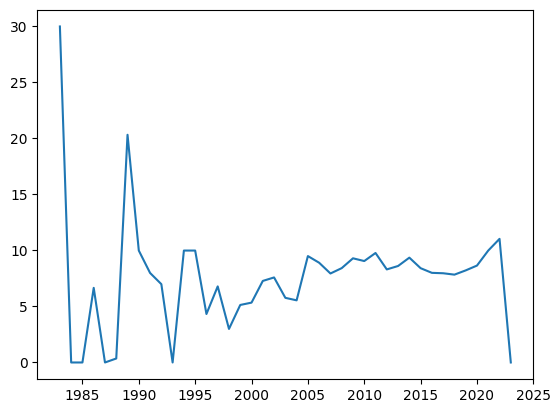

In [24]:
# média de preço no lançamento por ano
plt.plot(year_loop_array, mean_prince_per_year)

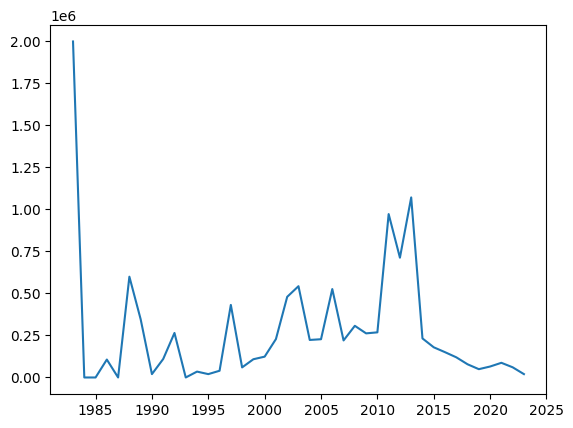

In [25]:
# menor número estimado de compradores por ano
plt.plot(year_loop_array, lowest_estimated_owners_number_per_year)

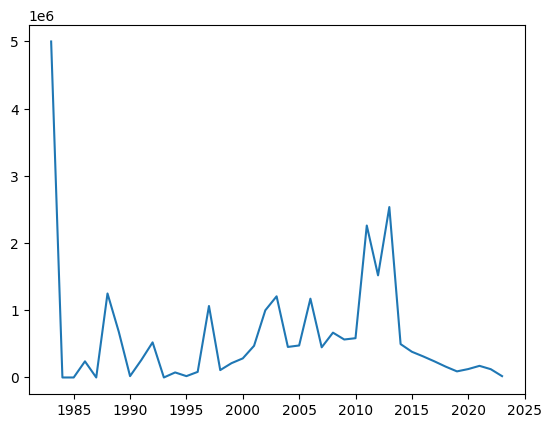

In [26]:
# maior número estimado de compradores por ano
plt.plot(year_loop_array, highest_estimated_owners_number_per_year)

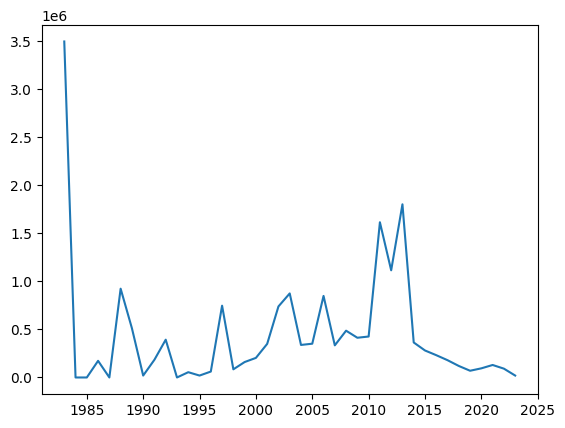

In [27]:
# número médio estimado de compradores por ano
plt.plot(year_loop_array, average_estimated_owners_number_per_year)

In [23]:
compradores_estimados = rpg_games_data['average_estimated_owners_number'] 
ano_lancamento = rpg_games_data['release_year']
a = compradores_estimados.sort_values(key=lambda col: col.str.replace(',', '').astype('float64')) # substituindo as strings por floats, e ordenando

NameError: name 'rpg_games_data' is not defined

In [ ]:
b = list(map(lambda str: str.replace(',', ''), a)) # criando um array b usando uma transformação sobre a
b = np.asarray(b, dtype=float) # transformando b em um vetor do numpy de floats
media = np.mean(b)
media

In [ ]:
c = np.asarray(ano_lancamento, dtype=int)
plt.hist(c, bins=40) # plotando o número de jogos lançados no ano 

In [ ]:
d19 = tabela.loc[rpg_games_data['release_year'] == 2019] # nessa célula, vamos começar a investigar qual ano vendeu o maior montante de cópias de jogos, e calcular a relação cópia/jogo por ano
d20 = tabela.loc[rpg_games_data['release_year'] == 2020]
d21 = tabela.loc[rpg_games_data['release_year'] == 2021]

copias_d19_str = d19['average_estimated_owners_number']
copias_d20_str = d20['average_estimated_owners_number']
copias_d21_str = d21['average_estimated_owners_number']

copias_d19 = list(map(lambda str: str.replace(',', ''), copias_d19_str))
copias_d19 = np.asarray(copias_d19, dtype=float)

copias_d20 = list(map(lambda str: str.replace(',', ''), copias_d20_str))
copias_d20 = np.asarray(copias_d20, dtype=float)

copias_d21 = list(map(lambda str: str.replace(',', ''), copias_d21_str))
copias_d21 = np.asarray(copias_d21, dtype=float)

total_copias_d19 = np.sum(copias_d19)
total_copias_d20 = np.sum(copias_d20)
total_copias_d21 = np.sum(copias_d21)

In [ ]:
print(total_copias_d19)
print(total_copias_d20)
print(total_copias_d21)

print(copias_d19.size)
print(copias_d20.size)
print(copias_d21.size)

print(np.mean(copias_d19)) # equivalente a total_copias_d19/copias_d19.size
print(np.mean(copias_d20))
print(np.mean(copias_d21))

# ideia: obter essa média de cópias vendidas por ano para todo o conjunto de amostras, e plotar o gráfico. observar se acompanha a distribuição de número de jogos lançados por ano

In [ ]:
precos_d19 = d19['release_price'] # análise da média de preço por ano
precos_d19 = np.asarray(precos_d19)

precos_d20 = d20['release_price']
precos_d20 = np.asarray(precos_d20)

precos_d21= d21['release_price']
precos_d21 = np.asarray(precos_d21)

print(np.mean(precos_d19))
print(np.mean(precos_d20))
print(np.mean(precos_d21))

In [ ]:
big_seller_d19 = np.where(copias_d19>100000) # análise sobre a média de preço para jogos que venderam mais de 100k cópias
big_seller_d20 = np.where(copias_d20>100000)
big_seller_d21 = np.where(copias_d21>100000)

print(np.mean(precos_d19[big_seller_d19]))
print(np.mean(precos_d20[big_seller_d20]))
print(np.mean(precos_d21[big_seller_d21]))

In [ ]:
release_year_tab = rpg_games_data1['release_year']

oldest_date = np.min(release_year_tab)
earliest_date = np.max(release_year_tab)

year_array = np.arange(oldest_date, earliest_date+1)

year_data_array = []
for year in year_array:
    year_data = rpg_games_data1.loc[rpg_games_data1['release_year'] == year]
    year_data_array.append(year_data)
    
mean_prices_year = []
for year_data in year_data_array:
    prices_d = year_data['release_price']
    prices_d = np.asarray(prices_d)
    mean_price = np.mean(prices_d)
    mean_prices_year.append(mean_price)
    
mean_prices_year = np.asarray(mean_prices_year)    
    
mean_prices_year[np.isnan(mean_prices_year)] = 0   

In [ ]:
plt.plot(year_array, mean_prices_year)